In [1]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
import pickle

#Set directory
current_directory_path = r"C:\\Users\\atr8e/OneDrive/Documents/MSDS/2024_Spring/DS_6050/Project/Milestone_3/Models_and_Datasets/Ensemble_Model/"
os.chdir(current_directory_path)

# ML Libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical

# Load Preprocessed Data

In [42]:
# Set path to the data and models
dataset_dir = r"C:\\Users\\atr8e/OneDrive/Documents/MSDS/2024_Spring/DS_6050/Project/Milestone_3/Models_and_Datasets/Ensemble_Model/"

# Iterate through files in the folder
for file_name in os.listdir(dataset_dir):
    # Check if the file has .pkl extension
    if file_name.endswith('.pkl'):
        # Load the pickle file
        file_path = os.path.join(dataset_dir, file_name)
        with open(file_path, 'rb') as file:
            images, labels = pickle.load(file)
            
        # Convert to numpy arrays
        images, labels = np.array(images), np.array(labels)
        
        # Assign loaded data to variables with modified names
        # Remove .pkl extension from the file name
        variable_name = os.path.splitext(file_name)[0]
        # Assign loaded data to variables with modified names
        globals()[f"{variable_name}_images"] = images
        globals()[f"{variable_name}_labels"] = labels

        # Optionally, you can print the loaded data for verification
        print(f"Loaded {variable_name}_images with length {images.shape}")
        print(f"Loaded {variable_name}_labels with length {len(labels)}")

Loaded en_cv_test_images with length (262, 256, 256)
Loaded en_cv_test_labels with length 262
Loaded en_cv_train_images with length (2080, 256, 256)
Loaded en_cv_train_labels with length 2080
Loaded en_cv_val_images with length (260, 256, 256)
Loaded en_cv_val_labels with length 260
Loaded en_main_test_images with length (425, 256, 256)
Loaded en_main_test_labels with length 425
Loaded en_main_train_images with length (3360, 256, 256)
Loaded en_main_train_labels with length 3360
Loaded en_main_val_images with length (420, 256, 256)
Loaded en_main_val_labels with length 420
Loaded en_pn_test_images with length (270, 256, 256)
Loaded en_pn_test_labels with length 270
Loaded en_pn_train_images with length (2145, 256, 256)
Loaded en_pn_train_labels with length 2145
Loaded en_pn_val_images with length (268, 256, 256)
Loaded en_pn_val_labels with length 268
Loaded en_tb_test_images with length (141, 256, 256)
Loaded en_tb_test_labels with length 141
Loaded en_tb_train_images with length (112

# Consistency Across Models

In [3]:
num_classes = 1
img_height = 256
img_width = 256
input_shape = (256, 256, 1)

# Main Model

In [4]:
Main_model = Sequential([
    layers.Input(shape=input_shape),
    layers.Conv2D(6, (5, 5), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(16, (5, 5), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(120, activation='relu'),
    layers.Dense(84, activation='relu'),
    layers.Dense(num_classes, activation='sigmoid')
])

In [5]:
Main_model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [6]:
Main_history = Main_model.fit(en_main_train_images, en_main_train_labels,
                          epochs=10,
                          batch_size=32,
                          validation_data=(en_main_val_images, en_main_val_labels))

Epoch 1/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 9s 82ms/step - accuracy: 0.6479 - loss: 64.8638 - val_accuracy: 0.8714 - val_loss: 0.3484
Epoch 2/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 8s 75ms/step - accuracy: 0.9177 - loss: 0.2182 - val_accuracy: 0.9238 - val_loss: 0.3279
Epoch 3/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 8s 77ms/step - accuracy: 0.9672 - loss: 0.1052 - val_accuracy: 0.9310 - val_loss: 0.3603
Epoch 4/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 8s 76ms/step - accuracy: 0.9918 - loss: 0.0248 - val_accuracy: 0.9000 - val_loss: 0.3551
Epoch 5/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 8s 78ms/step - accuracy: 0.9672 - loss: 0.0881 - val_accuracy: 0.9095 - val_loss: 0.4891
Epoch 6/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 8s 79ms/step - accuracy: 0.9810 - loss: 0.0507 - val_accuracy: 0.9238 - val_loss: 0.3675
Epoch 7/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 8s 81ms/step - accuracy: 0.9937 - loss: 0.0161 - val_accuracy: 0.9262 - val_loss: 0.5661
Epoch 8/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 8s 80ms/step - accuracy: 0.9984 - loss: 0.0069 - val_acc

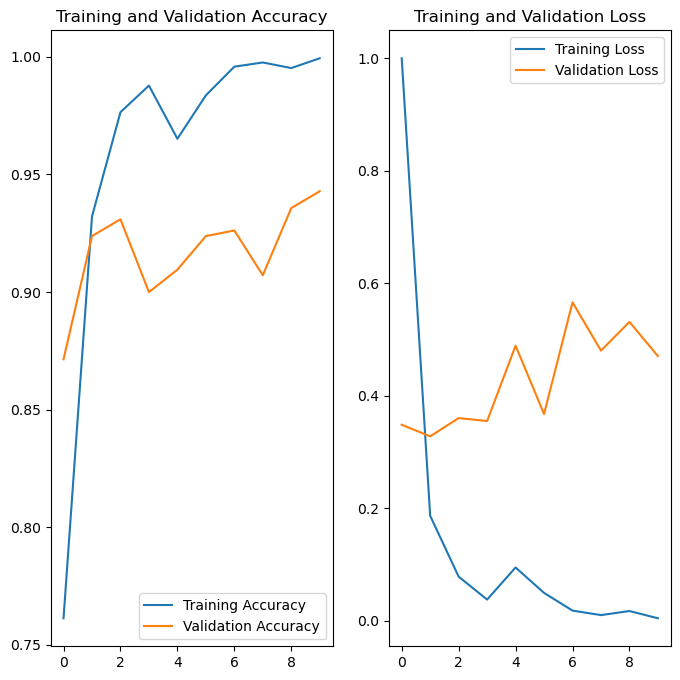

In [37]:
epochs = 10
acc = Main_history.history['accuracy']
val_acc = Main_history.history['val_accuracy']

loss = [min([x, 1]) for x in Main_history.history['loss']]
val_loss = [min([x, 1]) for x in Main_history.history['val_loss']]

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [8]:
test_loss, test_accuracy = Main_model.evaluate(en_main_test_images, en_main_test_labels)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9561 - loss: 0.5172
Test Loss: 0.6569362282752991
Test Accuracy: 0.9247058629989624


In [9]:
#Main_model.summary()

### Save the model and training history

In [38]:
# Specify the file path where you want to save the model
model_save_path = r"C:\\Users\\atr8e/OneDrive/Documents/MSDS/2024_Spring/DS_6050/Project/Milestone_3/Models_and_Datasets/Ensemble_Model/Main_model.keras"

# Save the trained model to the specified file path
Main_model.save(model_save_path)

print("Model saved successfully at:", model_save_path)

Model saved successfully at: C:\\Users\\atr8e/OneDrive/Documents/MSDS/2024_Spring/DS_6050/Project/Milestone_3/Models_and_Datasets/Ensemble_Model/Main_model.keras


# Pneumonia Model

In [28]:
PN_model = Sequential([
    layers.Input(shape=input_shape),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='sigmoid')
])

In [29]:
PN_model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [30]:
PN_history = PN_model.fit(en_pn_train_images, en_pn_train_labels,
                          epochs=10,
                          batch_size=32,
                          validation_data=(en_pn_val_images, en_pn_val_labels))

Epoch 1/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 12s 158ms/step - accuracy: 0.6953 - loss: 85.8508 - val_accuracy: 0.9440 - val_loss: 0.1710
Epoch 2/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 11s 158ms/step - accuracy: 0.9518 - loss: 0.1299 - val_accuracy: 0.9590 - val_loss: 0.1713
Epoch 3/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 11s 155ms/step - accuracy: 0.9620 - loss: 0.1100 - val_accuracy: 0.9478 - val_loss: 0.1386
Epoch 4/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 11s 156ms/step - accuracy: 0.9839 - loss: 0.0481 - val_accuracy: 0.9478 - val_loss: 0.1392
Epoch 5/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 12s 169ms/step - accuracy: 0.9796 - loss: 0.0480 - val_accuracy: 0.9739 - val_loss: 0.1628
Epoch 6/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 11s 167ms/step - accuracy: 0.9906 - loss: 0.0207 - val_accuracy: 0.9627 - val_loss: 0.2455
Epoch 7/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 12s 170ms/step - accuracy: 0.9951 - loss: 0.0157 - val_accuracy: 0.9664 - val_loss: 0.2821
Epoch 8/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 12s 174ms/step - accuracy: 0.9949 - loss: 0.0133 - val_acc

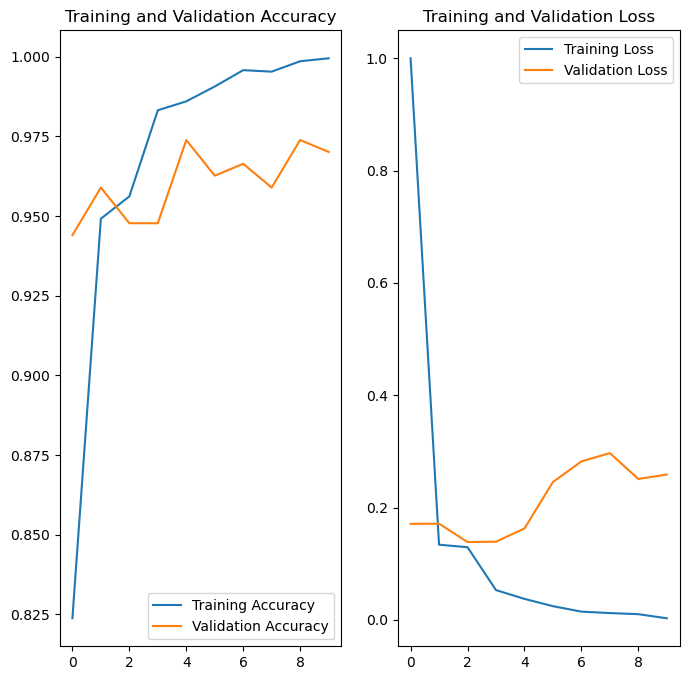

In [34]:
epochs = 10
acc = PN_history.history['accuracy']
val_acc = PN_history.history['val_accuracy']

loss = [min([x, 1]) for x in PN_history.history['loss']]
val_loss = [min([x, 1]) for x in PN_history.history['val_loss']]

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [32]:
test_loss, test_accuracy = PN_model.evaluate(en_pn_test_images, en_pn_test_labels)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.9569 - loss: 0.2693
Test Loss: 0.16796810925006866
Test Accuracy: 0.9629629850387573


In [33]:
#PN_model.summary()

### Save the model and training history

In [39]:
# Specify the file path where you want to save the model
model_save_path = r"C:\\Users\\atr8e/OneDrive/Documents/MSDS/2024_Spring/DS_6050/Project/Milestone_3/Models_and_Datasets/Ensemble_Model/PN_model.keras"

# Save the trained model to the specified file path
PN_model.save(model_save_path)

print("Model saved successfully at:", model_save_path)

Model saved successfully at: C:\\Users\\atr8e/OneDrive/Documents/MSDS/2024_Spring/DS_6050/Project/Milestone_3/Models_and_Datasets/Ensemble_Model/PN_model.keras


# Covid Model

In [16]:
CV_model = Sequential([
    layers.Input(shape=input_shape),
    layers.Conv2D(6, (5, 5), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(16, (5, 5), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(120, activation='relu'),
    layers.Dense(84, activation='relu'),
    layers.Dense(num_classes, activation='sigmoid')
])

In [17]:
CV_model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [18]:
CV_history = CV_model.fit(en_cv_train_images, en_cv_train_labels,
                          epochs=10,
                          batch_size=32,
                          validation_data=(en_cv_val_images, en_cv_val_labels))

Epoch 1/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 6s 85ms/step - accuracy: 0.6952 - loss: 57.0087 - val_accuracy: 0.9154 - val_loss: 0.2653
Epoch 2/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - accuracy: 0.9774 - loss: 0.0822 - val_accuracy: 0.9308 - val_loss: 0.3143
Epoch 3/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - accuracy: 0.9921 - loss: 0.0247 - val_accuracy: 0.9269 - val_loss: 0.3275
Epoch 4/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - accuracy: 0.9951 - loss: 0.0154 - val_accuracy: 0.9269 - val_loss: 0.3240
Epoch 5/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - accuracy: 0.9998 - loss: 0.0030 - val_accuracy: 0.9308 - val_loss: 0.3633
Epoch 6/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 6s 85ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 0.9346 - val_loss: 0.4118
Epoch 7/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 6s 90ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 0.9423 - val_loss: 0.4401
Epoch 8/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 6s 88ms/step - accuracy: 1.0000 - loss: 4.0180e-04 - val_accuracy: 0.938

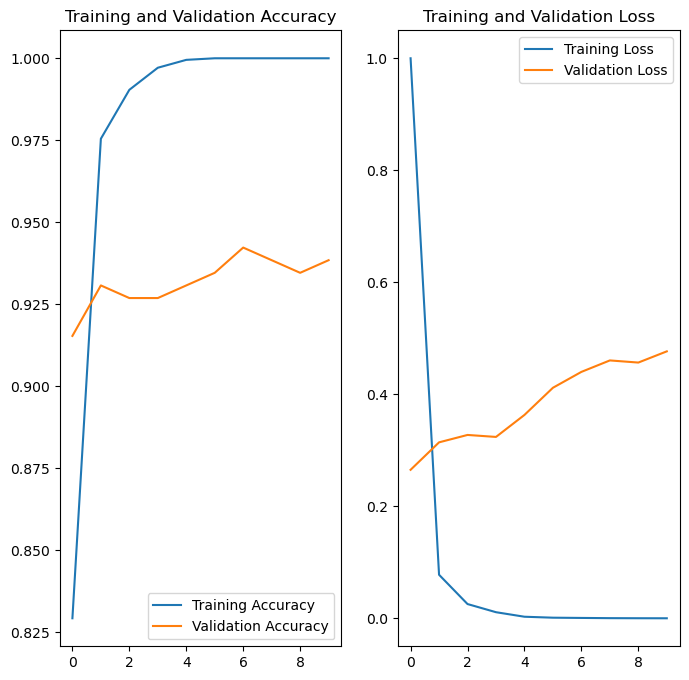

In [35]:
epochs = 10
acc = CV_history.history['accuracy']
val_acc = CV_history.history['val_accuracy']

loss = [min([x, 1]) for x in CV_history.history['loss']]
val_loss = [min([x, 1]) for x in CV_history.history['val_loss']]

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [20]:
test_loss, test_accuracy = CV_model.evaluate(en_cv_test_images, en_cv_test_labels)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9612 - loss: 0.1434
Test Loss: 0.19638116657733917
Test Accuracy: 0.9541984796524048


In [21]:
#CV_model.summary()

### Save the model and training history

In [40]:
# Specify the file path where you want to save the model
model_save_path = r"C:\\Users\\atr8e/OneDrive/Documents/MSDS/2024_Spring/DS_6050/Project/Milestone_3/Models_and_Datasets/Ensemble_Model/CV_model.keras"

# Save the trained model to the specified file path
CV_model.save(model_save_path)

print("Model saved successfully at:", model_save_path)

Model saved successfully at: C:\\Users\\atr8e/OneDrive/Documents/MSDS/2024_Spring/DS_6050/Project/Milestone_3/Models_and_Datasets/Ensemble_Model/CV_model.keras


# Tuberculosis Model

In [22]:
TB_model = Sequential([
    layers.Input(shape=input_shape),
    layers.Conv2D(6, (5, 5), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(16, (5, 5), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(120, activation='relu'),
    layers.Dense(84, activation='relu'),
    layers.Dense(num_classes, activation='sigmoid')
])

In [23]:
TB_model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [24]:
TB_history = TB_model.fit(en_tb_train_images, en_tb_train_labels,
                          epochs=10,
                          batch_size=32,
                          validation_data=(en_tb_val_images, en_tb_val_labels))

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 86ms/step - accuracy: 0.6122 - loss: 41.3867 - val_accuracy: 0.8643 - val_loss: 0.4830
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - accuracy: 0.9482 - loss: 0.1683 - val_accuracy: 0.8857 - val_loss: 0.3717
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - accuracy: 0.9778 - loss: 0.0604 - val_accuracy: 0.8786 - val_loss: 0.3565
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.9953 - loss: 0.0187 - val_accuracy: 0.9357 - val_loss: 0.2503
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - accuracy: 1.0000 - loss: 0.0027 - val_accuracy: 0.9357 - val_loss: 0.3003
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - accuracy: 1.0000 - loss: 5.4035e-04 - val_accuracy: 0.9357 - val_loss: 0.3090
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step - accuracy: 1.0000 - loss: 2.3906e-04 - val_accuracy: 0.9357 - val_loss: 0.3264
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - accuracy: 1.0000 - loss: 1.1572e-04 - val_accurac

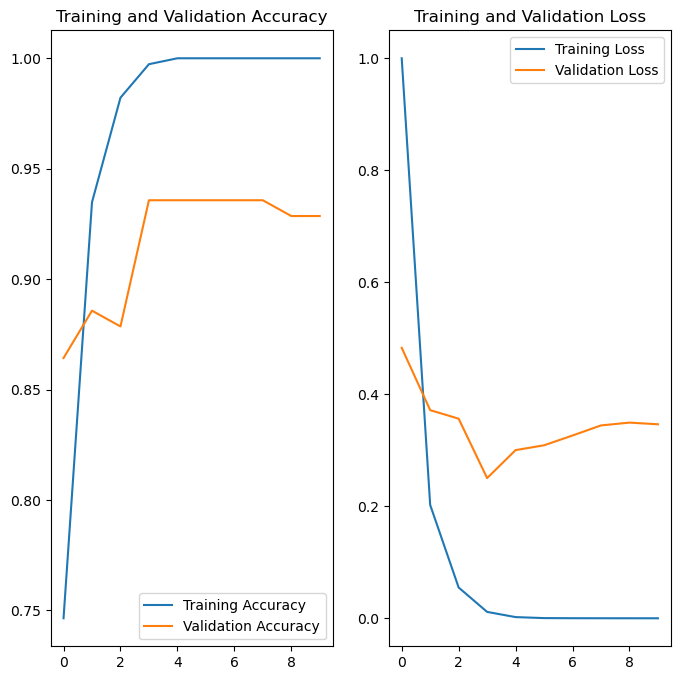

In [36]:
epochs = 10
acc = TB_history.history['accuracy']
val_acc = TB_history.history['val_accuracy']

loss = [min([x, 1]) for x in TB_history.history['loss']]
val_loss = [min([x, 1]) for x in TB_history.history['val_loss']]

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [26]:
test_loss, test_accuracy = TB_model.evaluate(en_tb_test_images, en_tb_test_labels)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8857 - loss: 1.0442
Test Loss: 0.8340056538581848
Test Accuracy: 0.9007092118263245


In [27]:
#TB_model.summary()

### Save the model and training history

In [41]:
# Specify the file path where you want to save the model
model_save_path = r"C:\\Users\\atr8e/OneDrive/Documents/MSDS/2024_Spring/DS_6050/Project/Milestone_3/Models_and_Datasets/Ensemble_Model/TB_model.keras"

# Save the trained model to the specified file path
TB_model.save(model_save_path)

print("Model saved successfully at:", model_save_path)

Model saved successfully at: C:\\Users\\atr8e/OneDrive/Documents/MSDS/2024_Spring/DS_6050/Project/Milestone_3/Models_and_Datasets/Ensemble_Model/TB_model.keras


## Unbalanced Training Data

In [46]:
Unbalanced_TB_model = Sequential([
    layers.Input(shape=input_shape),
    layers.Conv2D(6, (5, 5), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(16, (5, 5), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(120, activation='relu'),
    layers.Dense(84, activation='relu'),
    layers.Dense(num_classes, activation='sigmoid')
])

In [47]:
Unbalanced_TB_model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [48]:
Unbalanced_TB_history = Unbalanced_TB_model.fit(en_tb_unbalanced_train_images, en_tb_unbalanced_train_labels,
                          epochs=10,
                          batch_size=32,
                          validation_data=(en_tb_unbalanced_val_images, en_tb_unbalanced_val_labels))

Epoch 1/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 9s 79ms/step - accuracy: 0.7887 - loss: 87.7684 - val_accuracy: 0.9214 - val_loss: 0.2286
Epoch 2/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 8s 77ms/step - accuracy: 0.9537 - loss: 0.1387 - val_accuracy: 0.9476 - val_loss: 0.1730
Epoch 3/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 8s 79ms/step - accuracy: 0.9791 - loss: 0.0610 - val_accuracy: 0.9595 - val_loss: 0.1025
Epoch 4/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 9s 87ms/step - accuracy: 0.9955 - loss: 0.0182 - val_accuracy: 0.9690 - val_loss: 0.1006
Epoch 5/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 9s 87ms/step - accuracy: 0.9976 - loss: 0.0095 - val_accuracy: 0.9643 - val_loss: 0.1504
Epoch 6/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 9s 84ms/step - accuracy: 0.9959 - loss: 0.0118 - val_accuracy: 0.9548 - val_loss: 0.1588
Epoch 7/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 9s 82ms/step - accuracy: 0.9825 - loss: 0.0639 - val_accuracy: 0.9595 - val_loss: 0.2088
Epoch 8/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 8s 80ms/step - accuracy: 0.9813 - loss: 0.0623 - val_acc

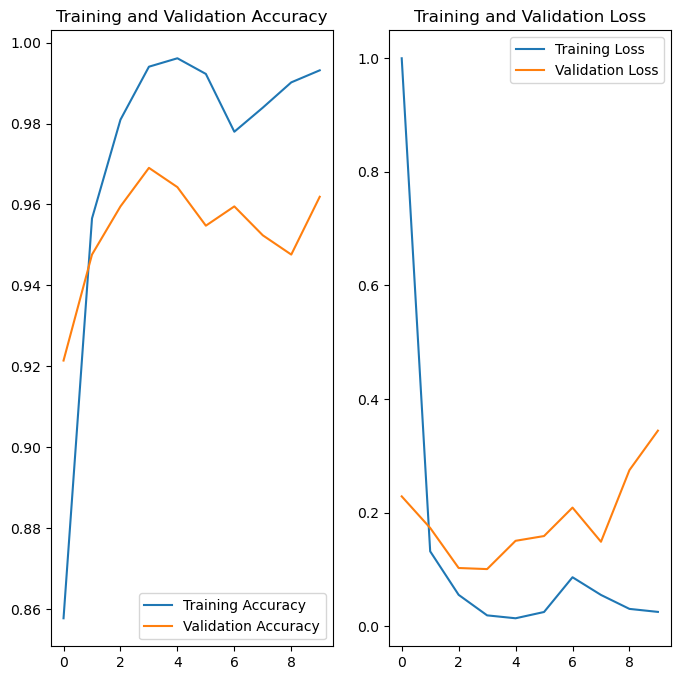

In [49]:
epochs = 10
acc = Unbalanced_TB_history.history['accuracy']
val_acc = Unbalanced_TB_history.history['val_accuracy']

loss = [min([x, 1]) for x in Unbalanced_TB_history.history['loss']]
val_loss = [min([x, 1]) for x in Unbalanced_TB_history.history['val_loss']]

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [50]:
test_loss, test_accuracy = Unbalanced_TB_model.evaluate(en_tb_unbalanced_test_images, en_tb_unbalanced_test_labels)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9603 - loss: 0.2592
Test Loss: 0.3425462543964386
Test Accuracy: 0.9547619223594666


In [51]:
#Unbalanced_TB_model.summary()